<a href="https://colab.research.google.com/github/RafaSFernandes/DS_Projects/blob/main/Compara%C3%A7%C3%B5es_de_Modelos_de_Regress%C3%A3o_e_Pr%C3%A9_Processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Escola DNC

Aluno: Rafael Souza Fernandes

Material de estudo

#0. Recursos iniciais

##0.1. Bibliotecas

In [763]:
#Dados
import pandas as pd

#Matemática
import numpy as np
# from random import randint

import os
from datetime import datetime

#Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#sklearn
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split #Separação de treino e teste
# from sklearn.model_selection import cross_val_score #KFold #Validação K-fold

from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_squared_error, mean_absolute_percentage_error

# #Métricas de avaliação
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #Métricas
# from sklearn.metrics import confusion_matrix #Matriz de confusão
# from sklearn.metrics import classification_report #Relatório com métricas de avaliação

##0.2. Funções

In [204]:
#função para substituir espaços em branco por underline

def rename_columns(data_frame):                            #define a função passando um data_frame como parâmetro
  for name in data_frame.columns.values:                   #iteração para cada nome de coluna (noma da coluna representada por "name")
    for split in name.split():                             #iteração para cada plavra que compõe um nome (palavra representada por "split")
      if split == name.split()[0]:                         #se for a primeira palavra
        rename = split                                     #define a primeira palavra de rename ("rename" gera como resultado o novo nome da coluna)
      else:                                                #caso contrário
        rename += "_" + split                              #concatena _ com a próxima palavra
    data_frame = data_frame.rename(columns={name:rename})  #atualiza o nome desta coluna
  return data_frame                                        #retorna um data_frame com as colunas renomeadas

In [205]:
#Leitura do dataset
def read_file_csv(path, filename):
  # Verifica se o Google Drive já está montado
  if not os.path.ismount('/content/drive'):
    # Montagem do drive para importar base de dados
    from google.colab import drive
    drive.mount('/content/drive')

  # Leitura do arquivo
  df = pd.read_csv(path + filename)

  return df

In [206]:
def residual_plot(y_pred, residuals):
  plt.scatter(x=y_pred, y=residuals) #plot dos pontos residuais
  plt.axhline(0, color="red", linestyle="--") #plot de linha horizontal (zero)

  #rótulos
  plt.xlabel("Predicted values")
  plt.ylabel("Residuals")

  plt.title("Residual plot") #titulo

  plt.show() #exibe o plot gráfico

In [207]:
#report de regressão
def regression_report(y_true, y_pred): #definindo a função

  MAE = mean_absolute_error(y_true, y_pred)
  MSE = mean_squared_error(y_true, y_pred)
  RMSE = root_mean_squared_error(y_true, y_pred)
  MAPE = mean_absolute_percentage_error(y_true, y_pred)
  R2 = r2_score(y_true, y_pred)

  #criando o report no formato tipo Series
  report = pd.Series({
      "MAE" : MAE,
      "MSE" : MSE,
      "RMSE": RMSE,
      "MAPE": MAPE,
      "R2"  : R2
  })

  return report

In [290]:
def add_model_metrics(model, X_train, y_train, X_test, y_test, comparative_report, name):
  '''
    Report comparativo de métricas entre modelos
    Parâmetros:
      model: modelo de machine learning
      X_train: variáveis de treino
      y_train: variável alvo de treino
      X_test: variáveis de teste
      y_test: variável alvo de teste
      comparative_report: relatório comparativo de métricas
      name: nome do modelo
    Retorno:
      comparative_report
  '''
  model.fit(X_train, y_train)     # Treina modelo que será adicionado
  y_pred = model.predict(X_test)  # Prevê os dados neste modelo
  if name in comparative_report.columns:  # Se o nome do modelos já constar na lista de colunas do Report
    comparative_report[name] = regression_report(y_test, y_pred)  # Atualiza os valores nesta coluna
    return comparative_report # Retorna o report atualizado
  else: # Caso contrário
    return pd.concat([comparative_report, regression_report(y_test, y_pred)], axis=1).rename(columns={0: name}) # Adiciona a nova coluna no comparative_report com as métricas e nome do novo modelo

In [555]:
def data_split(X, y, test_size=0.2, random_state=42):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  return X_train, X_test, y_train, y_test

In [727]:
# One hot encoder aplicado nas colunas categóricas
def encoding(X_train, X_test, cat_features):
  encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas") # Encoder
  encoder.fit(X_train[cat_features])  # Treino

  # Transformação das colunas categóricas de treino e teste
  X_train_cat_cols = encoder.transform(X_train[cat_features])
  X_test_cat_cols = encoder.transform(X_test[cat_features])

  # Adicionando as novas categorias categóricas numéricas e removendo as anteriores
  X_train = pd.concat([X_train.drop(columns=cat_features), X_train_cat_cols], axis=1)
  X_test = pd.concat([X_test.drop(columns=cat_features), X_test_cat_cols], axis=1)

  return X_train, X_test # Retorna treino e teste

#1. Importando dados

In [208]:
#nome do arquivo e caminho
path = "/content/drive/MyDrive/Datasets_Modulos/Materia_09/"
filename = "airplane_price_dataset.csv"

In [209]:
#leitura do arquivo
df = read_file_csv(path, filename)

#2. Explorando dados

In [210]:
df

,Model,Üretim Yılı,Motor Sayısı,Motor Türü,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Satış Bölgesi,Fiyat ($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asya,1.285708e+07
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Avrupa,1.391406e+07
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,9.073570e+07
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,1.366597e+08
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,38,Güney Amerika,2.037981e+05
...,...,...,...,...,...,...,...,...,...,...,...
12372,Boeing 777,1994,2,Turbofan,396,15600,12.16,3054.29,29,Avrupa,3.898071e+08
12373,Bombardier CRJ200,2005,2,Turbofan,50,3000,8.26,3107.67,18,Afrika,1.593888e+07
12374,Boeing 737,2015,2,Turbofan,162,5700,6.93,3972.16,8,Kuzey Amerika,9.870994e+07
12375,Cessna 172,2013,1,Piston,4,1285,14.28,999.84,10,Afrika,3.965207e+05


In [211]:
# Lista de novos nomes das colunas
columns_names = [
    'Modelo',
    'Ano de producao',
    'Numero de motores',
    'Tipo de motor',
    'Capacidade',
    'Autonomia (km)',
    'Cosumo de combustivel_(L/h)',
    'Custo de manutencao por hora ($)',
    'Idade',
    'Regiao de vendas',
    'Preco ($)'
]

In [212]:
# Atualizando nomes das colunas
df.columns = columns_names

In [213]:
# Verificando colunas
df.columns

Index(['Modelo', 'Ano de producao', 'Numero de motores', 'Tipo de motor',
       'Capacidade', 'Autonomia (km)', 'Cosumo de combustivel_(L/h)',
       'Custo de manutencao por hora ($)', 'Idade', 'Regiao de vendas',
       'Preco ($)'],
      dtype='object')

In [214]:
# Verificando dimensões
df.shape

(12377, 11)

In [215]:
# Verificando tipos de dados
df.dtypes

,0
Modelo,object
Ano de producao,int64
Numero de motores,int64
Tipo de motor,object
Capacidade,int64
Autonomia (km),int64
Cosumo de combustivel_(L/h),float64
Custo de manutencao por hora ($),float64
Idade,int64
Regiao de vendas,object


In [216]:
# Verificando presenças de valores nulos
df.isnull().any()

,0
Modelo,False
Ano de producao,False
Numero de motores,False
Tipo de motor,False
Capacidade,False
Autonomia (km),False
Cosumo de combustivel_(L/h),False
Custo de manutencao por hora ($),False
Idade,False
Regiao de vendas,False


In [217]:
# Verificando presença de duplicatas
df.duplicated().any()

np.False_

In [218]:
# Verificando valores únicos (sondagem nas colunas categóricas)
df.nunique()

,0
Modelo,6
Ano de producao,44
Numero de motores,2
Tipo de motor,2
Capacidade,6
Autonomia (km),6
Cosumo de combustivel_(L/h),2704
Custo de manutencao por hora ($),12218
Idade,44
Regiao de vendas,6


In [219]:
# Analisando a variável target "Preço"
target = df['Preco ($)']

In [220]:
# Estatísticas da variável target
target.describe()

,Preco ($)
count,1.237700e+04
mean,1.988336e+08
std,2.290392e+08
min,1.458148e+05
25%,1.409681e+07
50%,8.392191e+07
75%,3.843239e+08
max,9.782132e+08


In [221]:
# Reformatando estatísticas para avaliar sem notação científica
pd.DataFrame(target).describe().style.format("{:,.3f}")

,Preco ($)
count,"12,377.000"
mean,"198,833,649.571"
std,"229,039,179.233"
min,"145,814.790"
25%,"14,096,813.610"
50%,"83,921,913.750"
75%,"384,323,880.640"
max,"978,213,228.630"


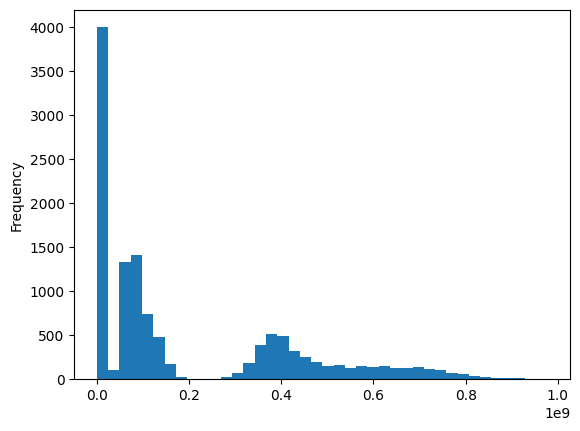

In [222]:
# Histograma de frequência dos dados
target.plot(kind="hist", bins=40);

Observa-se que os dados não seguem uma distribuição normal

In [223]:
# Alterando escala de valores de unidades de dólares para milhões de dólares
df[target.name] = df[target.name] / 10**6

In [224]:
# Renomeando a coluna para informar a nova unidade de medida
df.rename(columns={"Preco ($)": "Preco em milhoes ($)"}, inplace=True)

In [225]:
# Verificando a tabela apóes modificações
df

,Modelo,Ano de producao,Numero de motores,Tipo de motor,Capacidade,Autonomia (km),Cosumo de combustivel_(L/h),Custo de manutencao por hora ($),Idade,Regiao de vendas,Preco em milhoes ($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asya,12.857084
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Avrupa,13.914059
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,90.735696
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,136.659689
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,38,Güney Amerika,0.203798
...,...,...,...,...,...,...,...,...,...,...,...
12372,Boeing 777,1994,2,Turbofan,396,15600,12.16,3054.29,29,Avrupa,389.807070
12373,Bombardier CRJ200,2005,2,Turbofan,50,3000,8.26,3107.67,18,Afrika,15.938876
12374,Boeing 737,2015,2,Turbofan,162,5700,6.93,3972.16,8,Kuzey Amerika,98.709939
12375,Cessna 172,2013,1,Piston,4,1285,14.28,999.84,10,Afrika,0.396521


In [226]:
# Atualizando a variável target
target = df['Preco em milhoes ($)']

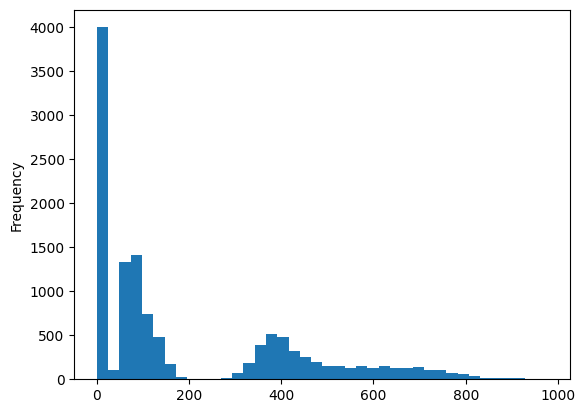

In [227]:
# Plotando o histograma atualizado
target.plot(kind="hist", bins=40);

In [228]:
# Selecionando colunas categóricas e suas estatísticas
df.select_dtypes('object').describe()

,Modelo,Tipo de motor,Regiao de vendas
count,12377,12377,12377
unique,6,2,6
top,Boeing 737,Turbofan,Afrika
freq,2121,10338,2171


#3. Tratamento de dados

In [229]:
# Separando variáveis X e y
X = df.drop(columns=target.name)
y = target

In [230]:
# Colunas categóricas
cat_features = df.select_dtypes('object').columns.values

In [231]:
# Separando variáveis de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
# Criando o encoder para variáveis categóricas
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas") # Encoder
encoder.fit(X_train[cat_features])  # Treino

OneHotEncoder(sparse_output=False)

In [233]:
# Transofrmação das colunas categóricas na variável de treino
X_train_cat_cols = encoder.transform(X_train[cat_features])
# Transofrmação das colunas categóricas na variável de teste
X_test_cat_cols = encoder.transform(X_test[cat_features])

In [234]:
# Atualização das variáveis de treino e teste
X_train = pd.concat([X_train.drop(columns=cat_features), X_train_cat_cols], axis=1)
X_test = pd.concat([X_test.drop(columns=cat_features), X_test_cat_cols], axis=1)

In [235]:
# Verificando as dimensões apóes transformações
print(X_train.shape, X_test.shape)

(9901, 21) (2476, 21)


#4. Modelagem

##4.1. Decision Tree Regressor (DTR)

In [362]:
from sklearn.tree import DecisionTreeRegressor

In [728]:
# Cria o modelo e treina
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [729]:
# Prevê os valores de y
y_pred = model.predict(X_test)

In [731]:
# Cria uma dataframe de report comparativo entre os modelos
comparative_report = pd.DataFrame(regression_report(y_test, y_pred), columns=["DTR"])
comparative_report

,DTR
MAE,23.093169
MSE,1970.238594
RMSE,44.387370
MAPE,0.116711
R2,0.963141


##4.2. k-NN Regressor (kNN)

In [733]:
from sklearn.neighbors import KNeighborsRegressor

In [754]:
# Adiciona este modelo ao dataframe comparativo
comparative_report = add_model_metrics(KNeighborsRegressor(n_neighbors=5), X_train, y_train, X_test, y_test, comparative_report, "kNN")
comparative_report

,DTR,kNN,RFR,GBR,NN,MLP,LR
MAE,23.093169,22.964970,17.219442,16.743990,22.808328,22.808328,49.679166
MSE,1970.238594,2070.493795,1089.297122,974.303388,1521.506368,1521.506368,4689.009168
RMSE,44.387370,45.502679,33.004502,31.213833,39.006491,39.006491,68.476340
MAPE,0.116711,0.111956,0.087551,0.718925,1.614555,1.614555,25.316450
R2,0.963141,0.961265,0.979622,0.981773,0.971536,0.971536,0.912279


##4.3. Random Forest Regressor (RFR)

In [371]:
from sklearn.ensemble import RandomForestRegressor

In [755]:
# Adiciona este modelo ao dataframe comparativo
comparative_report = add_model_metrics(RandomForestRegressor(random_state=42), X_train, y_train, X_test, y_test, comparative_report, "RFR")
comparative_report

,DTR,kNN,RFR,GBR,NN,MLP,LR
MAE,23.093169,22.964970,17.219442,16.743990,22.808328,22.808328,49.679166
MSE,1970.238594,2070.493795,1089.297122,974.303388,1521.506368,1521.506368,4689.009168
RMSE,44.387370,45.502679,33.004502,31.213833,39.006491,39.006491,68.476340
MAPE,0.116711,0.111956,0.087551,0.718925,1.614555,1.614555,25.316450
R2,0.963141,0.961265,0.979622,0.981773,0.971536,0.971536,0.912279


##4.4. Gradient Boosting Regressor (GBR)

In [375]:
from sklearn.ensemble import GradientBoostingRegressor

In [756]:
# Adiciona este modelo ao dataframe comparativo
comparative_report = add_model_metrics(GradientBoostingRegressor(random_state=42), X_train, y_train, X_test, y_test, comparative_report, "GBR")
comparative_report

,DTR,kNN,RFR,GBR,NN,MLP,LR
MAE,23.093169,22.964970,17.219442,16.743990,22.808328,22.808328,49.679166
MSE,1970.238594,2070.493795,1089.297122,974.303388,1521.506368,1521.506368,4689.009168
RMSE,44.387370,45.502679,33.004502,31.213833,39.006491,39.006491,68.476340
MAPE,0.116711,0.111956,0.087551,0.718925,1.614555,1.614555,25.316450
R2,0.963141,0.961265,0.979622,0.981773,0.971536,0.971536,0.912279


##4.5. Neural Network (NN)

In [377]:
from sklearn.neural_network import MLPRegressor

In [757]:
# Adiciona este modelo ao dataframe comparativo
comparative_report = add_model_metrics(MLPRegressor(hidden_layer_sizes=(50, 50), random_state=42), X_train, y_train, X_test, y_test, comparative_report, "MLP")
comparative_report

,DTR,kNN,RFR,GBR,NN,MLP,LR
MAE,23.093169,22.964970,17.219442,16.743990,22.808328,22.808328,49.679166
MSE,1970.238594,2070.493795,1089.297122,974.303388,1521.506368,1521.506368,4689.009168
RMSE,44.387370,45.502679,33.004502,31.213833,39.006491,39.006491,68.476340
MAPE,0.116711,0.111956,0.087551,0.718925,1.614555,1.614555,25.316450
R2,0.963141,0.961265,0.979622,0.981773,0.971536,0.971536,0.912279


##4.6. Linear Regressor (LR)

In [758]:
# Adiciona este modelo ao dataframe comparativo
comparative_report = add_model_metrics(LinearRegression(), X_train, y_train, X_test, y_test, comparative_report, "LR")
comparative_report.sort_values(by="R2", axis=1, ascending=True)

,LR,kNN,DTR,NN,MLP,RFR,GBR
MAE,49.679166,22.964970,23.093169,22.808328,22.808328,17.219442,16.743990
MSE,4689.009168,2070.493795,1970.238594,1521.506368,1521.506368,1089.297122,974.303388
RMSE,68.476340,45.502679,44.387370,39.006491,39.006491,33.004502,31.213833
MAPE,25.316450,0.111956,0.116711,1.614555,1.614555,0.087551,0.718925
R2,0.912279,0.961265,0.963141,0.971536,0.971536,0.979622,0.981773


#5. Validação Cruzada



## 5.1. Cross Validation Score

In [761]:
from sklearn.model_selection import cross_val_score

In [762]:
# Criando dicionário para iteração de modelos
models = {
    "LR": LinearRegression(),
    "DTR": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "RFR": RandomForestRegressor(random_state=42),
    "GBR": GradientBoostingRegressor(random_state=42),
    "MLP": MLPRegressor(random_state=42)
}

In [764]:
# Cria dicionário para armazenar os resultados
results = {}

# Iteração entre os modelos
for model_name, model in models.items(): # Para cada nome do modelo e modelo definido no dicionário "models"
  inicio = datetime.now() # Marcador de início da validação
  print(model_name)       # Imprime o nome do modelo que está sendo validado
  cv_results = -cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_absolute_error") # Resultados da validação cruzada por MAE score para o model

  # Armazena os resultados da média e desvio de MAE, junto com o tempo de execução da validação do model
  results[model_name] = {
      "mean_MAE": cv_results.mean(), # Armazena a média dos folds para o model
      "std_MAE": cv_results.std(),   # Armazena o desvio dos folds para o model
      "tempo_execucao": (datetime.now() - inicio).total_seconds() # Armazena o tempo de execução da validação para o model
  }

LR
DTR
KNN
RFR
GBR
MLP


In [766]:
# Organiza o dicionário "results" na forma de dataframe
df_results = pd.DataFrame(results)

In [768]:
# Exibe os modelos em ordem crescente de MAE médio
df_results.T["mean_MAE"].sort_values()

,mean_MAE
GBR,16.429401
RFR,17.368041
KNN,22.980543
DTR,23.417588
MLP,30.761131
LR,48.329511


In [771]:
# Plot da validação cruzada
def cross_plot(col):
  col.sort_values(ascending=False).plot(kind="barh")  # Plot dos valores de col em ordem decrescente com barras horizontais
  for i, v in enumerate(col.sort_values(ascending=False)):  # Para cada posição i e valor v da coluna em ordem decrescente
    plt.text(
        v - 0.1*min(col), # Posição dentro da barra com um alinhamento de 10% à esquerda do limite direito da barra horizontal
        i,                # Posição (localização da barra, modelo de referência)
        str(round(v, 2)), # Valor do texto na forma de string correspondente à média MAE do modelo arredondado com duas casas decimais
        va="center",      # Alinhamento vertical centralizado
        ha="right",       # Alinhamento horizontal à direita (interno à barra horizontal)
        color="white",    # Cor do texto
        fontweight="bold" # Estilo do texto negrito
    ) # Plot no gráfico o valor v dentro da barra, na posição i, alinhado horizontalmente ao centro, cor branca e negrito

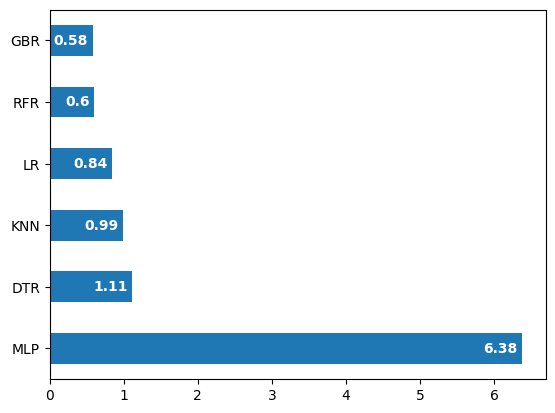

In [772]:
# Plot do gráfico
cross_plot(df_results.T["std_MAE"])

##5.2. K-Fold

In [454]:
from sklearn.model_selection import KFold

In [774]:
# Criando o modelo K-fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [775]:
# Refazendo o split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [776]:
# Verificando o resultado do split
X_train.head()

,Modelo,Ano de producao,Numero de motores,Tipo de motor,Capacidade,Autonomia (km),Cosumo de combustivel_(L/h),Custo de manutencao por hora ($),Idade,Regiao de vendas
123,Airbus A350,1988,2,Turbofan,350,14800,9.45,4777.73,35,Avustralya
7033,Boeing 737,1986,2,Turbofan,162,5700,3.43,516.27,37,Güney Amerika
1952,Boeing 777,2017,2,Turbofan,396,15600,13.86,4709.85,6,Avustralya
10599,Airbus A320,1982,2,Turbofan,180,6300,3.42,2721.65,41,Avrupa
6131,Bombardier CRJ200,1989,2,Turbofan,50,3000,6.16,1974.45,34,Avrupa


In [777]:
# Lista de armazenamento dos folds
fold = []

for train_index, test_index in kfold.split(X_train):        # Para cada índice de treino e de teste no K-fold split (generator)
  X_train_fold = pd.DataFrame(X_train.iloc[train_index])    # Cria o dataframe de treino dos valores do fold
  X_test_fold = pd.DataFrame(X_train.iloc[test_index])      # Cria o dataframe de teste dos valores do fold

  fold.append({"Train":X_train_fold, "Test": X_test_fold})  # Adiciona a lista o par dicionário treino, teste para este fold

#6. Comparações de pré processamentos



##6.1. Encoding x Label

In [784]:
# Reset do split
X_train, X_test, y_train, y_test = data_split(X, y)

In [785]:
# Aplica o One Hot Encoding nas colunas
X_train, X_test = encoding(X_train, X_test, cat_features)

In [787]:
# Cria e treina o modelo a ser avaliado
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [702]:
# Prevê o valores para y
y_pred = model.predict(X_test)

In [788]:
# Cria um data frame para comparar os processamentos
encoding_comparision = pd.DataFrame(regression_report(y_test, y_pred), columns=["DTR_Encoding"])
encoding_comparision

,DTR_Encoding
MAE,17.219442
MSE,1089.297122
RMSE,33.004502
MAPE,0.087551
R2,0.979622


In [790]:
# Reset de split
X_train, X_test, y_train, y_test = data_split(X, y)

In [792]:
# Cria o encoder
encoder = LabelEncoder()

In [793]:
for col in cat_features:      # Para cada coluna col catagórica
  encoder.fit(X_train[col])   # Treina o encoder para col
  X_train[col] = encoder.transform(X_train[col])  # Transforma a coluna na variável de treino
  X_test[col] = encoder.transform(X_test[col])    # Transforma a coluna na variável de teste

In [794]:
# Adiciona a comparação dos encoders
encoding_comparision = add_model_metrics(model, X_train, y_train, X_test, y_test, encoding_comparision, "DTR_Label")
encoding_comparision

,DTR_Encoding,DTR_Label
MAE,17.219442,23.328621
MSE,1089.297122,2039.802692
RMSE,33.004502,45.164175
MAPE,0.087551,0.117550
R2,0.979622,0.961840


##6.2. Normal x Normalized

In [795]:
# Reset de split
X_train, X_test, y_train, y_test = data_split(X, y)

In [796]:
# One Hot Encoding
X_train, X_test = encoding(X_train, X_test, cat_features)

In [797]:
# Cria e treina o modelo a ser avaliado
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [798]:
# Prevê os valores de y
y_pred = model.predict(X_test)

In [799]:
# Cria o datafram de comparação entre normal e normalizado
normalized_comparision = pd.DataFrame(regression_report(y_test, y_pred), columns=["kNN_Normal"])
normalized_comparision

,kNN_Normal
MAE,22.964970
MSE,2070.493795
RMSE,45.502679
MAPE,0.111956
R2,0.961265


In [712]:
from sklearn.preprocessing import MinMaxScaler

In [800]:
# Cria e treina o modelo de normalização
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [806]:
# Transforma os dados de treino e teste (normaliza) e armazena nas variáveis normalizadas (não substitui os valores originais)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [807]:
# Adiciona o report ao datafram de comparação
normalized_comparision = add_model_metrics(model, X_train_normalized, y_train, X_test_normalized, y_test, normalized_comparision, "kNN_Normalized")
normalized_comparision

,kNN_Normal,kNN_Normalized,MLP_Normal
MAE,22.964970,16.655596,22.808328
MSE,2070.493795,970.011631,1521.506368
RMSE,45.502679,31.145010,39.006491
MAPE,0.111956,0.446944,1.614555
R2,0.961265,0.981853,0.971536


In [808]:
# Cria outro modelo para avaliação
model = MLPRegressor(hidden_layer_sizes=(50, 50), random_state=42)

In [811]:
# Adiciona o report normal do MLP ao dataframe de comparação
normalized_comparision = add_model_metrics(model, X_train, y_train, X_test, y_test, normalized_comparision, "MLP_Normal")
normalized_comparision

,kNN_Normal,kNN_Normalized,MLP_Normal,MLP_Normalized
MAE,22.964970,16.655596,22.808328,16.655596
MSE,2070.493795,970.011631,1521.506368,970.011631
RMSE,45.502679,31.145010,39.006491,31.145010
MAPE,0.111956,0.446944,1.614555,0.446944
R2,0.961265,0.981853,0.971536,0.981853


In [812]:
# # Adiciona o report normalizado do MLP ao dataframe de comparação
normalized_comparision = add_model_metrics(model, X_train_normalized, y_train, X_test_normalized, y_test, normalized_comparision, "MLP_Normalized")
normalized_comparision

,kNN_Normal,kNN_Normalized,MLP_Normal,MLP_Normalized
MAE,22.964970,16.655596,22.808328,16.655596
MSE,2070.493795,970.011631,1521.506368,970.011631
RMSE,45.502679,31.145010,39.006491,31.145010
MAPE,0.111956,0.446944,1.614555,0.446944
R2,0.961265,0.981853,0.971536,0.981853


#7. Pipelines

In [859]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [860]:
from sklearn import set_config
set_config(transform_output="pandas") # Configura saídas array para o formato "pandas"

In [875]:
# Variáveis categóricas
cat_features

array(['Modelo', 'Tipo de motor', 'Regiao de vendas'], dtype=object)

In [878]:
# Variáveis numéricas
num_features = [col for col in X.columns if col not in cat_features] # Colunas de X que não são Categóricas

In [877]:
# Verificando variáveis numéricas
num_features

['Ano de producao',
 'Numero de motores',
 'Capacidade',
 'Autonomia (km)',
 'Cosumo de combustivel_(L/h)',
 'Custo de manutencao por hora ($)',
 'Idade']

In [881]:
# Transformações de variáveis numéricas (cadeia de passos)
numerical_transformer = Pipeline(   # Inicia a pipeline
    steps=[                         # Inicia a lista de passos
        ("scaler", MinMaxScaler())  # Cada passo é um par ordenado ("nome", função())
])

In [882]:
# Transformações de variáveis categóricas (cadeia de passos) (análogo à numerical transformer)
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(sparse_output=False))
])

In [884]:
# Cria o preprocessor transformado as colunas
preprocessor = ColumnTransformer( # Função de transformação de colunas
    transformers=[                # Lista de transformações a serem aplicadas. Cada transformação é uma tripla ("nome", transformação, colunas a serem transformadas)
        ("num", numerical_transformer, num_features),  # Transformação de colunas numéricas
        ("cat", categorical_transformer, cat_features) # Transformação de colunas categóricas
    ]
)

In [885]:
# Cria o pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))
])

In [886]:
# Exibindo o pipeline
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Ano de producao',
                                                   'Numero de motores',
                                                   'Capacidade',
                                                   'Autonomia (km)',
                                                   'Cosumo de '
                                                   'combustivel_(L/h)',
                                                   'Custo de manutencao por '
                                                   'hora ($)',
                                                   'Idade']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  array(['Modelo', 'Tipo de motor', 'Regiao de vendas'], dtype=object))])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [895]:
# Reset de split
X_train, X_test, y_train, y_test = data_split(X, y)

In [896]:
# Executando apenas o pipeline de preprocessor
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Ano de producao', 'Numero de motores',
                                  'Capacidade', 'Autonomia (km)',
                                  'Cosumo de combustivel_(L/h)',
                                  'Custo de manutencao por hora ($)',
                                  'Idade']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 array(['Modelo', 'Tipo de motor', 'Regiao de vendas'], dtype=object))])

In [899]:
# Aplica a transformação nas colunas
preprocessor.transform(X_train)

,num__Ano de producao,num__Numero de motores,num__Capacidade,num__Autonomia (km),num__Cosumo de combustivel_(L/h),num__Custo de manutencao por hora ($),num__Idade,cat__Modelo_Airbus A320,cat__Modelo_Airbus A350,cat__Modelo_Boeing 737,...,cat__Modelo_Bombardier CRJ200,cat__Modelo_Cessna 172,cat__Tipo de motor_Piston,cat__Tipo de motor_Turbofan,cat__Regiao de vendas_Afrika,cat__Regiao de vendas_Asya,cat__Regiao de vendas_Avrupa,cat__Regiao de vendas_Avustralya,cat__Regiao de vendas_Güney Amerika,cat__Regiao de vendas_Kuzey Amerika
123,0.186047,1.0,0.882653,0.944115,0.155305,0.950729,0.813953,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7033,0.139535,1.0,0.403061,0.308418,0.029810,0.003612,0.860465,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1952,0.860465,1.0,1.000000,1.000000,0.247238,0.935643,0.139535,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
10599,0.046512,1.0,0.448980,0.350332,0.029602,0.493761,0.953488,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6131,0.209302,1.0,0.117347,0.119804,0.086721,0.327695,0.790698,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0.302326,1.0,0.882653,0.944115,0.250573,0.445095,0.697674,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5191,0.116279,0.0,0.000000,0.000000,0.335210,0.162766,0.883721,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5390,0.139535,1.0,0.117347,0.119804,0.137378,0.124172,0.860465,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
860,0.906977,1.0,1.000000,1.000000,0.025849,0.728955,0.093023,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [901]:
# Treina o pipeline completo junto com o modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Ano de producao',
                                                   'Numero de motores',
                                                   'Capacidade',
                                                   'Autonomia (km)',
                                                   'Cosumo de '
                                                   'combustivel_(L/h)',
                                                   'Custo de manutencao por '
                                                   'hora ($)',
                                                   'Idade']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  array(['Modelo', 'Tipo de motor', 'Regiao de vendas'], dtype=object))])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [902]:
# Previsão de valores
y_pred = pipeline.predict(X_test)

In [904]:
# Report
regression_report(y_test, y_pred).rename("GBR_Pipeline")

,GBR_Pipeline
MAE,16.744993
MSE,974.442567
RMSE,31.216063
MAPE,0.718927
R2,0.981770
